# Wine Quality Prediction 

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data collection

In [13]:
wine_data = pd.read_csv("C:/Users/admin/Desktop/ML Projects/3) Wine Quality Prediction/winequality-red.csv")

In [3]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_data.shape

(1599, 12)

In [6]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
wine_data.duplicated().sum()

240

In [12]:
wine_data.drop_duplicates(keep = 'first', inplace = True)
wine_data.duplicated().sum()

0

### Data analysis and visualization

In [14]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


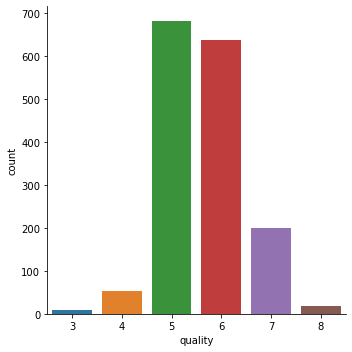

In [15]:
#number of values for each quality
sns.catplot(x = 'quality', data = wine_data, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

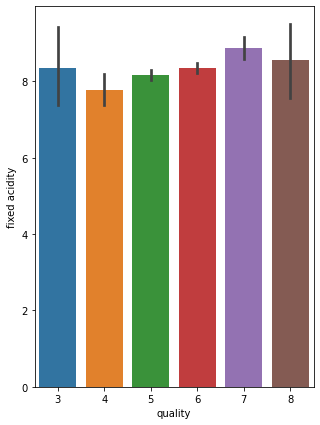

In [16]:
#fixed acidity vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='fixed acidity', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

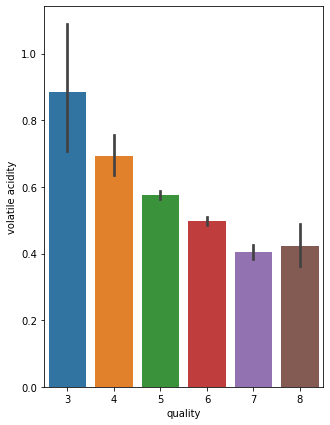

In [19]:
#volitile acidity vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='volatile acidity', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

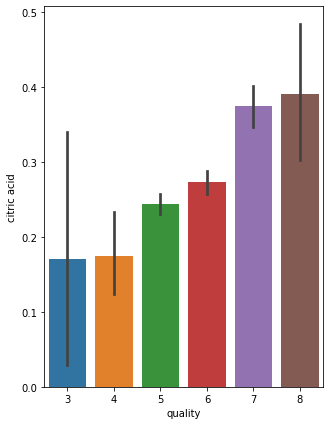

In [20]:
#citric acid vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='citric acid', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

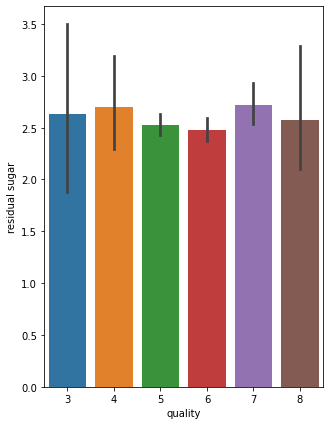

In [21]:
#residual sugar vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='residual sugar', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

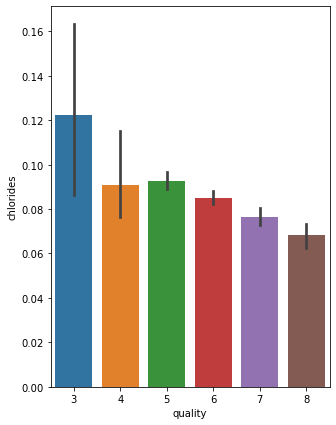

In [22]:
#chlorides vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='chlorides', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

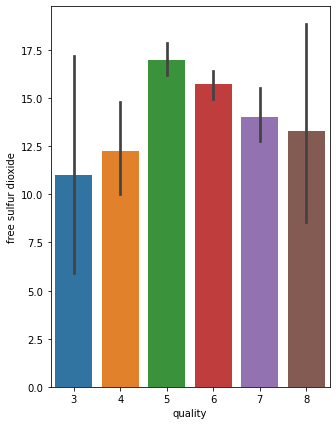

In [23]:
#free sulfur dioxide vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='free sulfur dioxide', data =wine_data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

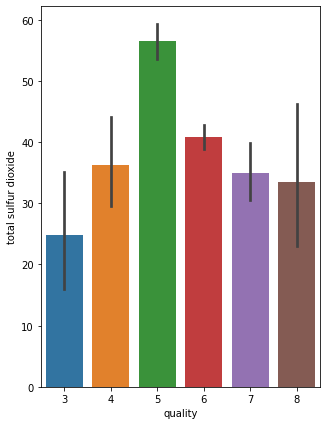

In [24]:
#total sulfur dioxide vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='total sulfur dioxide', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='density'>

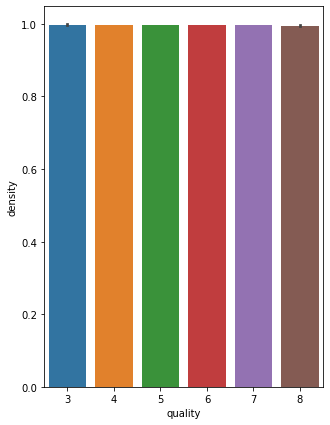

In [25]:
#density vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='density', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

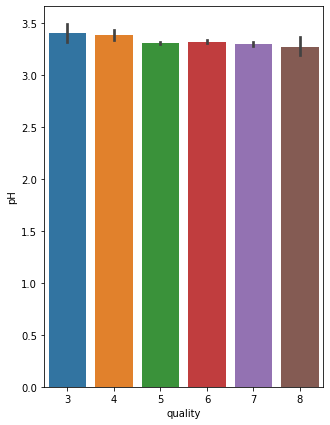

In [26]:
#pH vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='pH', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

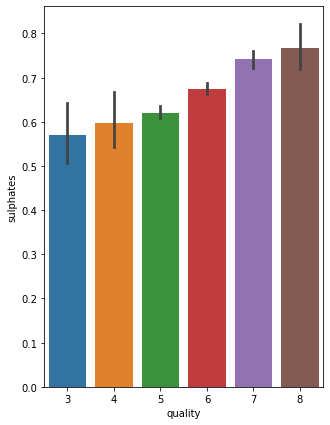

In [27]:
#sulphates vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='sulphates', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

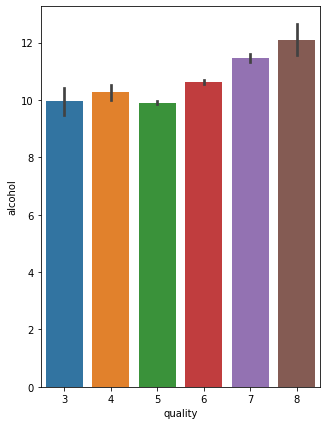

In [28]:
#alcohol vs quality
plt.figure(figsize=(5,7))
sns.barplot(x ='quality', y='alcohol', data = wine_data)

### Insights
1. As Quality increases volatile acidity and chlorides decreases.
2. As Quality increases citric acid and sulphates increases.

### Correlation

<AxesSubplot:>

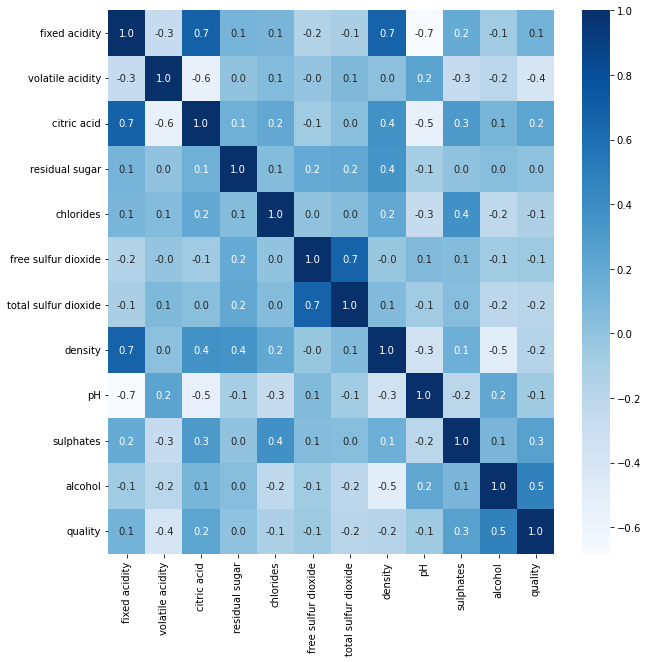

In [29]:
#heatmeap
plt.figure(figsize=(10,10))
sns.heatmap(wine_data.corr(), annot = True, cmap = 'Blues', fmt = '.1f')

### Data Preprocessing

In [33]:
#separating dataset
x = wine_data.drop('quality', axis = 1)

In [34]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Label binarization

In [36]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [37]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

### Train and Test split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [39]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1599, 11) (1279, 11) (320, 11)
(1599,) (1279,) (320,)


### Model training

In [44]:
#random forest classifier
rfc_model = RandomForestClassifier()

In [45]:
rfc_model.fit(x_train, y_train)

RandomForestClassifier()

### Evaluation

In [46]:
#accuracy score
data_prediction = rfc_model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, data_prediction)*100)

Accuracy Score:  90.625


### Building Predictive System

In [47]:
input_data = (7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshapr the data
reshaped_data = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(reshaped_data)
print(prediction)

if (prediction) == 1:
    print("It's a Good quality Wine")
else:
    print("It's a Bad quality Wine")

[1]
It's a Good quality Wine


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
